In [ ]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files

# GLOBAL HYPERPARAMS
# color list: [pass@5, pass@10, base, icl, ft, gpt]
colors = ["#bf6ba5", "#d90707", "#dd8452", "#55a868", "#64b5cd", "#4c72b0"]
linewidth_iid = 2.5
linewidth_repair = 2.8
mark_size = 10

# Ranges
USE_EQUAL_SCALE = True
mbxp_cli_range = [0.3, 0.85]
heval_cli_range = [0.15, 0.85]
min_heval_cli = 0.15
max_heval_cli = 0.85


In [ ]:
# Plots the data
# Plots on a scale equal across all rows
def plot_pass1(row, col, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title=""):


  # Plotting the pass@5 and pass@10 for r0
  ax = axs[row, col]
  ax.axhline(y=pass5, color=colors[0], linestyle='--', label='pass@5', linewidth=linewidth_iid)
  ax.axhline(y=pass10, color=colors[1], linestyle='--', label='pass@10', linewidth=linewidth_iid)

  # Plotting the line chart for each baseline
  rounds = [0,1,2,3,4]
  sns.lineplot(ax=ax, x=rounds, y=pass1_base, label="Base", marker="v", markersize=mark_size, color=colors[2], linewidth=linewidth_repair)
  sns.lineplot(ax=ax, x=rounds, y=pass1_icl, label="ICL", marker="s", markersize=mark_size, color=colors[3], linewidth=linewidth_repair)
  sns.lineplot(ax=ax, x=rounds, y=pass1_ft, label="DistiLRR", marker="o", markersize=mark_size, color=colors[4], linewidth=linewidth_repair)
  sns.lineplot(ax=ax, x=rounds, y=pass1_gpt, label="Teacher", marker="D", markersize=mark_size, color=colors[5], linewidth=linewidth_repair)

  # Adding benchmark label
  if col == 0:
    if row % 2:
      ax.set_ylabel("MBXP, Pass@1", fontsize=16, labelpad=6)
    else:
      ax.set_ylabel("HumanEval, Pass@1", fontsize=16, labelpad=6)

  # Adding repair round label
  if row % 2:
    ax.set_xlabel("Repair Round", fontsize=16, labelpad=10)

  # Adding title
  if title:
    ax.set_title(title, fontsize=16, pad=8)

  # Adjust x ticks
  ax.set_xticks(range(0, 5))

  # Adjust y ticks
  y_min = min(pass1_base)
  y_max = max(pass1_gpt)
  y_min = np.floor(y_min * 10) / 10
  y_max = np.ceil(y_max * 10) / 10
  y_ticks = np.arange(y_min, y_max, 0.1)
  ax.set_yticks(y_ticks)

  ax.legend().set_visible(False)
  ax.tick_params(axis='x', labelsize=12)
  ax.tick_params(axis='y', labelsize=12)
  ax.grid(True, alpha=0.8)

In [ ]:
#@title Camera Ready 4x3 cli
# CAMERA READY cl-7b-instruct
# 4 x 3
# ROWS: LRPL HumanEval, LRPL MBXP, HRPL HumanEval, HRPL MBXP
# COLS: Perl, Go, Swift, Python, Javascript, Java
fig, axs = plt.subplots(4, 3, figsize=(20, 18))

# Perl
lang = "Perl"
pass1_base = [0.353, 0.385, 0.402, 0.414, 0.427]
pass1_icl = [0.353, 0.410, 0.435, 0.458, 0.468]
pass1_ft = [0.353, 0.491, 0.552, 0.589, 0.608]
pass1_gpt = [0.353, 0.593, 0.664, 0.700, 0.714]
pass5 = 0.487
pass10 = 0.541
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.220, 0.248, 0.265, 0.285, 0.291]
pass1_icl = [0.220, 0.284, 0.322, 0.339, 0.360]
pass1_ft = [0.220, 0.339, 0.398, 0.424, 0.439]
pass1_gpt = [0.220, 0.448, 0.511, 0.557, 0.577]
pass5 = 0.344
pass10 = 0.397
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

# Go
lang = "Golang"
pass1_base = [0.364, 0.458, 0.479, 0.482, 0.490]
pass1_icl = [0.364, 0.489, 0.548, 0.575, 0.592]
pass1_ft = [0.364, 0.536, 0.584, 0.592, 0.614]
pass1_gpt = [0.364, 0.647, 0.728, 0.756, 0.769]
pass5 = 0.471
pass10 = 0.510
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.203, 0.233, 0.243, 0.255, 0.265]
pass1_icl = [0.203, 0.276, 0.336, 0.359, 0.389]
pass1_ft = [0.203, 0.323, 0.378, 0.411, 0.432]
pass1_gpt = [0.203, 0.456, 0.565, 0.601, 0.618]
pass5 = 0.313
pass10 = 0.350
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Low-Resource")

# Swift
lang = "Swift"
pass1_base = [0.338, 0.395, 0.418, 0.434, 0.446]
pass1_icl = [0.338, 0.461, 0.521, 0.539, 0.559]
pass1_ft = [0.338, 0.524, 0.581, 0.612, 0.633]
pass1_gpt = [0.338, 0.595, 0.657, 0.696, 0.708]
pass5 = 0.467
pass10 = 0.494
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.175, 0.212, 0.239, 0.265, 0.270]
pass1_icl = [0.175, 0.270, 0.318, 0.351, 0.368]
pass1_ft = [0.175, 0.324, 0.378, 0.412, 0.428]
pass1_gpt = [0.175, 0.409, 0.493, 0.535, 0.559]
pass5 = 0.266
pass10 = 0.310
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

# Python
lang = "Python"
pass1_base = [0.483, 0.533, 0.561, 0.579, 0.590]
pass1_icl = [0.483, 0.591, 0.640, 0.664, 0.677]
pass1_ft = [0.483, 0.606, 0.636, 0.646, 0.656]
pass1_gpt = [0.483, 0.737, 0.781, 0.800, 0.810]
pass5 = 0.580
pass10 = 0.598
plot_pass1(3, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.343, 0.374, 0.398, 0.413, 0.426]
pass1_icl = [0.343, 0.461, 0.518, 0.539, 0.560]
pass1_ft = [0.343, 0.462, 0.509, 0.537, 0.556]
pass1_gpt = [0.343, 0.687, 0.754, 0.782, 0.803]
pass5 = 0.442
pass5 = 0.487
plot_pass1(2, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

# Javascript
lang = "Javascript"
pass1_base = [0.524, 0.561, 0.583, 0.597, 0.603]
pass1_icl = [0.524, 0.602, 0.637, 0.656, 0.663]
pass1_ft = [0.524, 0.620, 0.640, 0.667, 0.685]
pass1_gpt = [0.524, 0.719, 0.761, 0.787, 0.801]
pass5 = 0.636
pass10 = 0.680
plot_pass1(3, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.342, 0.362, 0.381, 0.392, 0.407]
pass1_icl = [0.342, 0.417, 0.462, 0.483, 0.499]
pass1_ft = [0.342, 0.431, 0.469, 0.481, 0.495]
pass1_gpt = [0.342, 0.608, 0.678, 0.704, 0.734]
pass5 = 0.460
pass10 = 0.509
plot_pass1(2, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

# Java
lang = "Java"
pass1_base = [0.451, 0.512, 0.543, 0.569, 0.586]
pass1_icl = [0.451, 0.554, 0.587, 0.607, 0.625]
pass1_ft = [0.451, 0.597, 0.630, 0.648, 0.657]
pass1_gpt = [0.451, 0.689, 0.734, 0.750, 0.767]
pass5 = 0.595
pass10 = 0.632
plot_pass1(3, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.306, 0.341, 0.371, 0.387, 0.403]
pass1_icl = [0.306, 0.388, 0.427, 0.445, 0.464]
pass1_ft = [0.306, 0.392, 0.428, 0.442, 0.457]
pass1_gpt = [0.306, 0.519, 0.603, 0.649, 0.670]
pass5 = 0.436
pass10 = 0.490
plot_pass1(2, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

handles, labels = axs[0, 0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=6, fontsize=16, handlelength=4.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

# plt.savefig('plot.png')
# files.download('plot.png')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

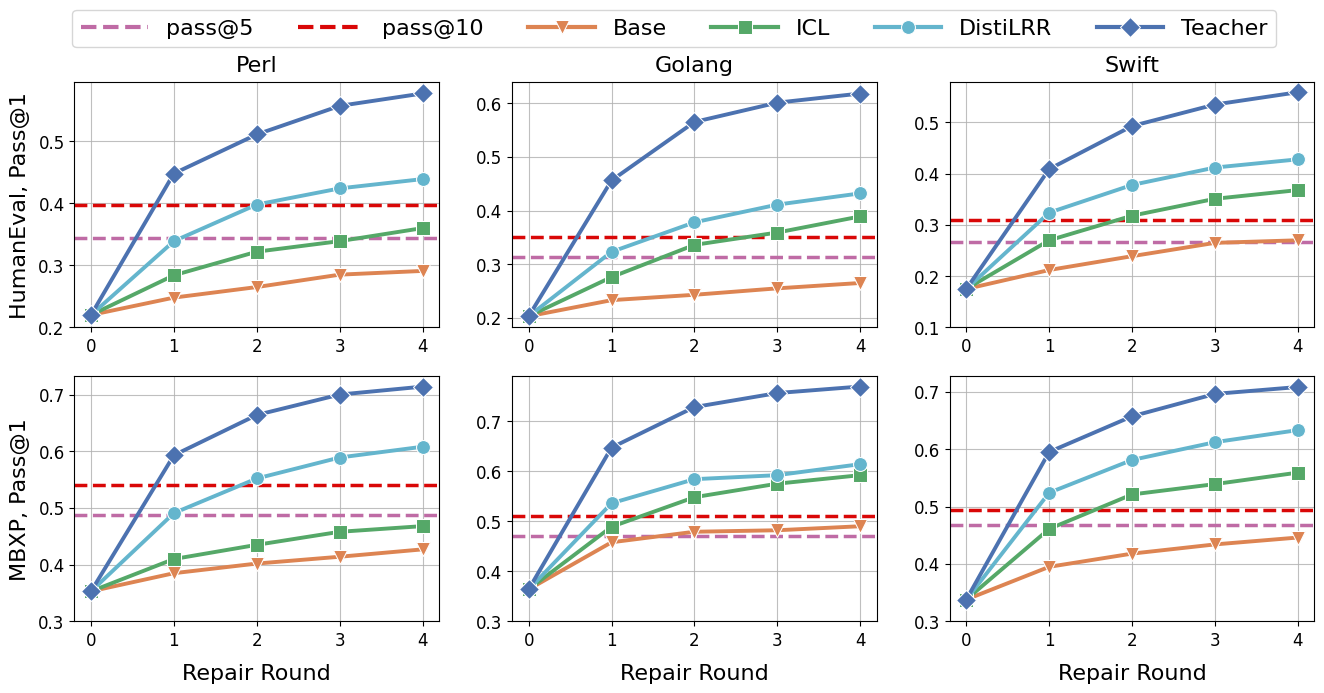

In [ ]:
#@title Camera Ready 2x3 cli
# Camera Ready LRPL Split
# 2 x 3
# ROWS: LRPL HumanEval, LRPL MBXP
# COLS: Perl, Go, Swift
fig, axs = plt.subplots(2, 3, figsize=(16,7))

# Perl
lang = "Perl"
pass1_base = [0.353, 0.385, 0.402, 0.414, 0.427]
pass1_icl = [0.353, 0.410, 0.435, 0.458, 0.468]
pass1_ft = [0.353, 0.491, 0.552, 0.589, 0.608]
pass1_gpt = [0.353, 0.593, 0.664, 0.700, 0.714]
pass5 = 0.487
pass10 = 0.541
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.220, 0.248, 0.265, 0.285, 0.291]
pass1_icl = [0.220, 0.284, 0.322, 0.339, 0.360]
pass1_ft = [0.220, 0.339, 0.398, 0.424, 0.439]
pass1_gpt = [0.220, 0.448, 0.511, 0.557, 0.577]
pass5 = 0.344
pass10 = 0.397
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Perl")

# Go
lang = "Golang"
pass1_base = [0.364, 0.458, 0.479, 0.482, 0.490]
pass1_icl = [0.364, 0.489, 0.548, 0.575, 0.592]
pass1_ft = [0.364, 0.536, 0.584, 0.592, 0.614]
pass1_gpt = [0.364, 0.647, 0.728, 0.756, 0.769]
pass5 = 0.471
pass10 = 0.510
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.203, 0.233, 0.243, 0.255, 0.265]
pass1_icl = [0.203, 0.276, 0.336, 0.359, 0.389]
pass1_ft = [0.203, 0.323, 0.378, 0.411, 0.432]
pass1_gpt = [0.203, 0.456, 0.565, 0.601, 0.618]
pass5 = 0.313
pass10 = 0.350
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Golang")

# Swift
lang = "Swift"
pass1_base = [0.338, 0.395, 0.418, 0.434, 0.446]
pass1_icl = [0.338, 0.461, 0.521, 0.539, 0.559]
pass1_ft = [0.338, 0.524, 0.581, 0.612, 0.633]
pass1_gpt = [0.338, 0.595, 0.657, 0.696, 0.708]
pass5 = 0.467
pass10 = 0.494
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.175, 0.212, 0.239, 0.265, 0.270]
pass1_icl = [0.175, 0.270, 0.318, 0.351, 0.368]
pass1_ft = [0.175, 0.324, 0.378, 0.412, 0.428]
pass1_gpt = [0.175, 0.409, 0.493, 0.535, 0.559]
pass5 = 0.266
pass10 = 0.310
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Swift")

handles, labels = axs[0, 0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=6, fontsize=16, handlelength=3.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

plt.savefig('plot_lrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_lrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

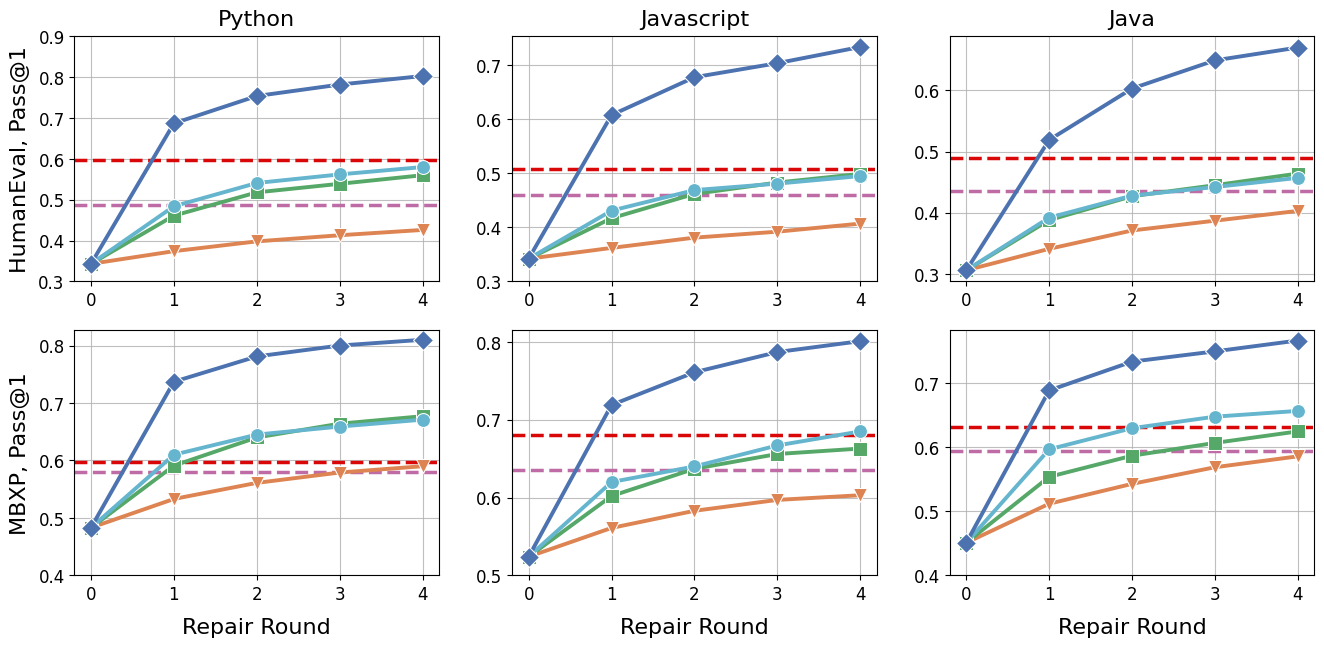

In [ ]:
#@title Camera Ready 2x3 cli
# Camera Ready HRPL Split
# 2 x 3
# ROWS: HRPL HumanEval, HRPL MBXP
# COLS: Python, Javascript, Java
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

# Python
lang = "Python"
pass1_base = [0.483, 0.533, 0.561, 0.579, 0.590]
pass1_icl = [0.483, 0.591, 0.640, 0.664, 0.677]
pass1_ft = [0.483, 0.610, 0.645, 0.659, 0.671]
pass1_gpt = [0.483, 0.737, 0.781, 0.800, 0.810]
pass5 = 0.580
pass10 = 0.598
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.343, 0.374, 0.398, 0.413, 0.426]
pass1_icl = [0.343, 0.461, 0.518, 0.539, 0.560]
pass1_ft = [0.343, 0.484, 0.541, 0.562, 0.580]
pass1_gpt = [0.343, 0.687, 0.754, 0.782, 0.803]
pass5 = 0.442
pass5 = 0.487
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Python")

# Javascript
lang = "Javascript"
pass1_base = [0.524, 0.561, 0.583, 0.597, 0.603]
pass1_icl = [0.524, 0.602, 0.637, 0.656, 0.663]
pass1_ft = [0.524, 0.620, 0.640, 0.667, 0.685]
pass1_gpt = [0.524, 0.719, 0.761, 0.787, 0.801]
pass5 = 0.636
pass10 = 0.680
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.342, 0.362, 0.381, 0.392, 0.407]
pass1_icl = [0.342, 0.417, 0.462, 0.483, 0.499]
pass1_ft = [0.342, 0.431, 0.469, 0.481, 0.495]
pass1_gpt = [0.342, 0.608, 0.678, 0.704, 0.734]
pass5 = 0.460
pass10 = 0.509
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Javascript")

# Java
lang = "Java"
pass1_base = [0.451, 0.512, 0.543, 0.569, 0.586]
pass1_icl = [0.451, 0.554, 0.587, 0.607, 0.625]
pass1_ft = [0.451, 0.597, 0.630, 0.648, 0.657]
pass1_gpt = [0.451, 0.689, 0.734, 0.750, 0.767]
pass5 = 0.595
pass10 = 0.632
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.306, 0.341, 0.371, 0.387, 0.403]
pass1_icl = [0.306, 0.388, 0.427, 0.445, 0.464]
pass1_ft = [0.306, 0.392, 0.428, 0.442, 0.457]
pass1_gpt = [0.306, 0.519, 0.603, 0.649, 0.670]
pass5 = 0.436
pass10 = 0.490
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Java")

plt.savefig('plot_hrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_hrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

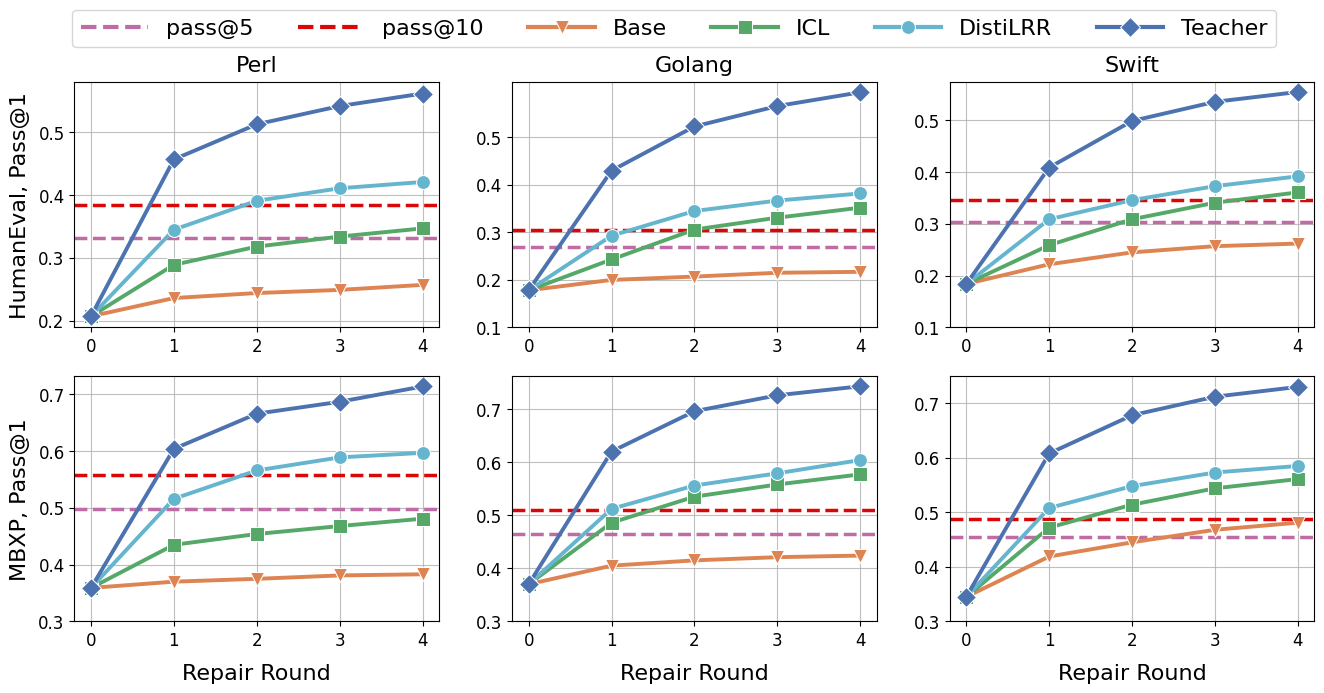

In [ ]:
#@title Camera Ready 2x3 clb
# Camera Ready LRPL Split
# 2 x 3
# ROWS: LRPL HumanEval, LRPL MBXP
# COLS: Perl, Go, Swift
fig, axs = plt.subplots(2, 3, figsize=(16,7))

# Perl
lang = "Perl"
pass1_base = [0.359, 0.370, 0.375, 0.381, 0.383]
pass1_icl = [0.359, 0.435, 0.454, 0.468, 0.481]
pass1_ft = [0.359, 0.516, 0.566, 0.589, 0.597]
pass1_gpt = [0.359, 0.604, 0.666, 0.687, 0.714]
pass5 = 0.498
pass10 = 0.558
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.207, 0.236, 0.244, 0.249, 0.257]
pass1_icl = [0.207, 0.289, 0.318, 0.334, 0.347]
pass1_ft = [0.207, 0.345, 0.391, 0.411, 0.421]
pass1_gpt = [0.207, 0.457, 0.513, 0.542, 0.562]
pass5 = 0.332
pass10 = 0.385
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Perl")

# Go
lang = "Golang"
pass1_base = [0.370, 0.405, 0.415, 0.421, 0.424]
pass1_icl = [0.370, 0.486, 0.535, 0.558, 0.577]
pass1_ft = [0.370, 0.512, 0.556, 0.579, 0.604]
pass1_gpt = [0.370, 0.620, 0.696, 0.726, 0.743]
pass5 = 0.465
pass10 = 0.510
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.178, 0.200, 0.207, 0.215, 0.217]
pass1_icl = [0.178, 0.243, 0.306, 0.331, 0.352]
pass1_ft = [0.178, 0.293, 0.345, 0.367, 0.382]
pass1_gpt = [0.178, 0.430, 0.523, 0.566, 0.595]
pass5 = 0.270
pass10 = 0.306
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Golang")

# Swift
lang = "Swift"
pass1_base = [0.345, 0.419, 0.445, 0.468, 0.481]
pass1_icl = [0.345, 0.472, 0.514, 0.544, 0.561]
pass1_ft = [0.345, 0.508, 0.548, 0.573, 0.585]
pass1_gpt = [0.345, 0.608, 0.678, 0.712, 0.730]
pass5 = 0.455
pass10 = 0.487
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.184, 0.222, 0.245, 0.257, 0.262]
pass1_icl = [0.184, 0.259, 0.309, 0.341, 0.361]
pass1_ft = [0.184, 0.309, 0.346, 0.373, 0.392]
pass1_gpt = [0.184, 0.409, 0.499, 0.536, 0.555]
pass5 = 0.304
pass10 = 0.347
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Swift")

handles, labels = axs[0, 0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=6, fontsize=16, handlelength=3.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

plt.savefig('plot_lrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_lrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

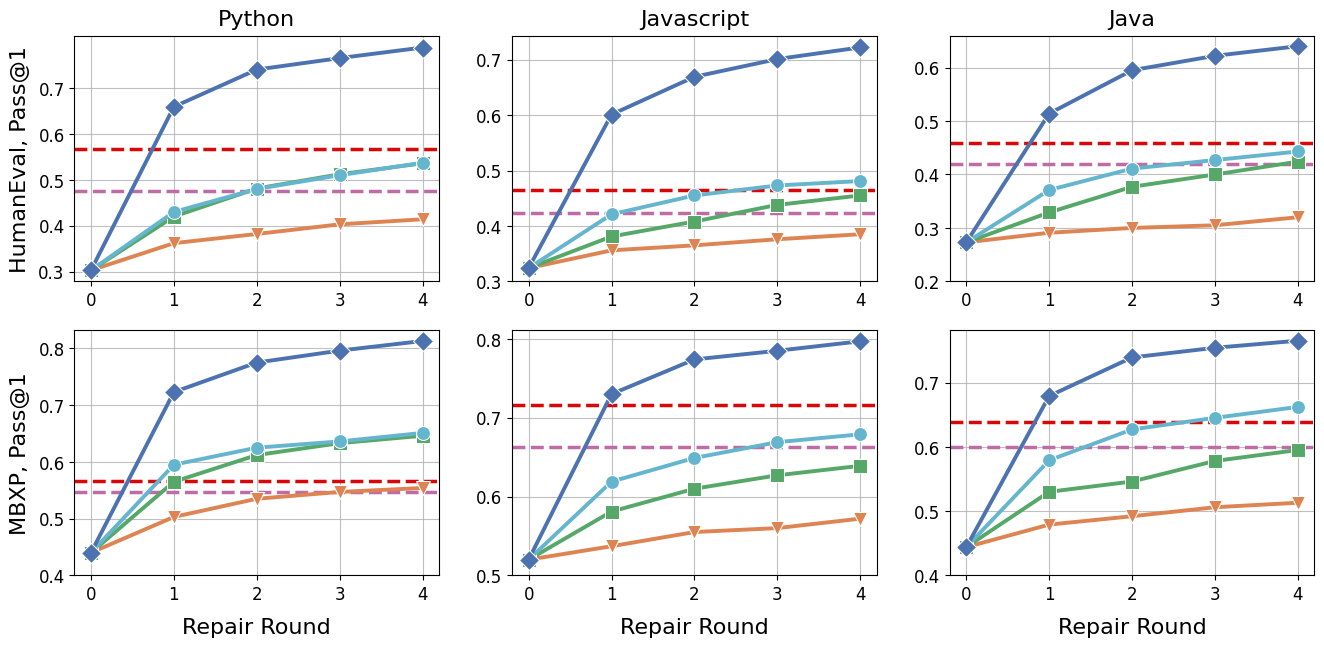

In [ ]:
#@title Camera Ready 2x3 clb
# Camera Ready HRPL Split
# 2 x 3
# ROWS: HRPL HumanEval, HRPL MBXP
# COLS: Python, Javascript, Java
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

# Python
lang = "Python"
pass1_base = [0.440, 0.503, 0.535, 0.547, 0.554]
pass1_icl = [0.440, 0.565, 0.612, 0.633, 0.646]
pass1_ft = [0.440, 0.595, 0.625, 0.636, 0.651]
pass1_gpt = [0.440, 0.723, 0.775, 0.796, 0.813]
pass5 = 0.547
pass10 = 0.566
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.303, 0.362, 0.382, 0.403, 0.414]
pass1_icl = [0.303, 0.420, 0.481, 0.512, 0.536]
pass1_ft = [0.303, 0.430, 0.480, 0.510, 0.537]
pass1_gpt = [0.303, 0.659, 0.740, 0.765, 0.788]
pass5 = 0.426
pass5 = 0.475
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Python")

# Javascript
lang = "Javascript"
pass1_base = [0.520, 0.537, 0.555, 0.560, 0.572]
pass1_icl = [0.520, 0.581, 0.610, 0.627, 0.639]
pass1_ft = [0.520, 0.619, 0.649, 0.669, 0.679]
pass1_gpt = [0.520, 0.730, 0.774, 0.785, 0.797]
pass5 = 0.663
pass10 = 0.716
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.324, 0.356, 0.365, 0.376, 0.385]
pass1_icl = [0.324, 0.381, 0.408, 0.438, 0.455]
pass1_ft = [0.324, 0.421, 0.455, 0.473, 0.481]
pass1_gpt = [0.324, 0.601, 0.669, 0.701, 0.722]
pass5 = 0.423
pass10 = 0.465
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Javascript")

# Java
lang = "Java"
pass1_base = [0.444, 0.479, 0.492, 0.506, 0.513]
pass1_icl = [0.444, 0.530, 0.546, 0.578, 0.595]
pass1_ft = [0.444, 0.579, 0.627, 0.645, 0.662]
pass1_gpt = [0.444, 0.679, 0.739, 0.754, 0.765]
pass5 = 0.599
pass10 = 0.638
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.273, 0.291, 0.300, 0.305, 0.320]
pass1_icl = [0.273, 0.329, 0.377, 0.400, 0.424]
pass1_ft = [0.273, 0.371, 0.411, 0.427, 0.443]
pass1_gpt = [0.273, 0.514, 0.595, 0.622, 0.640]
pass5 = 0.420
pass10 = 0.459
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Java")

plt.savefig('plot_hrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_hrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

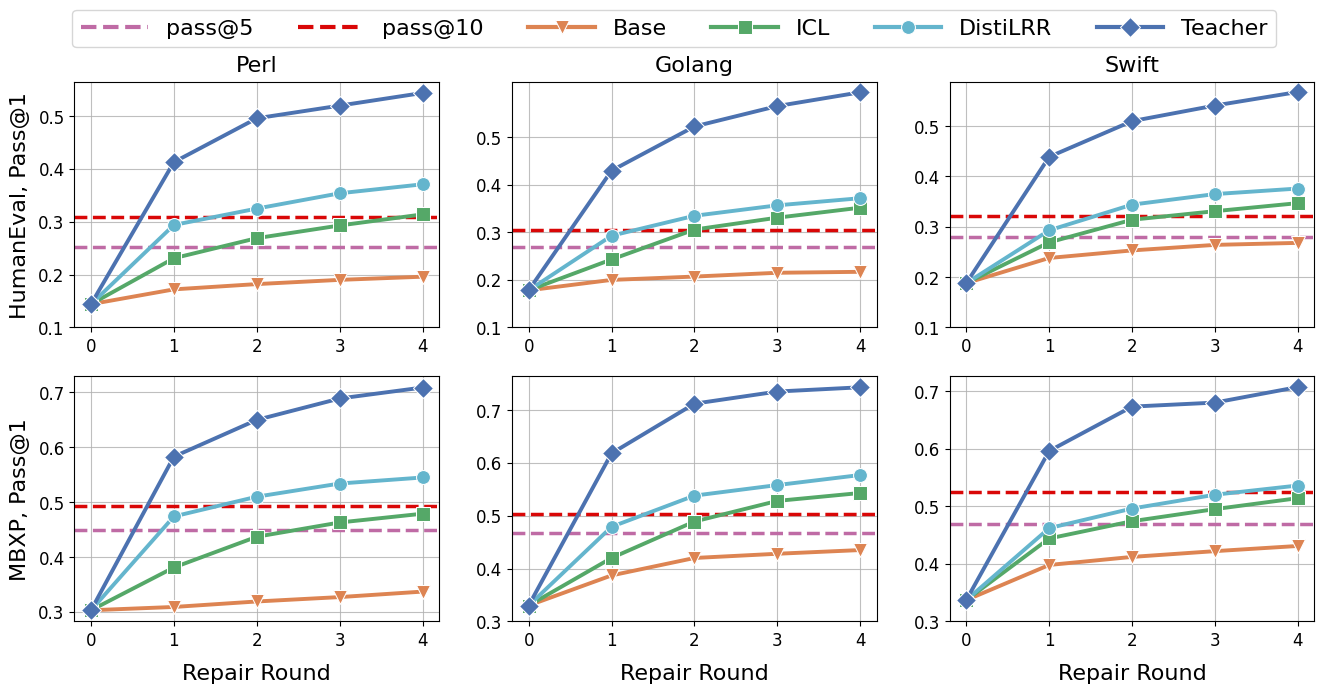

In [ ]:
#@title Camera Ready 2x3 mist
# Camera Ready LRPL Split
# 2 x 3
# ROWS: LRPL HumanEval, LRPL MBXP
# COLS: Perl, Go, Swift
fig, axs = plt.subplots(2, 3, figsize=(16,7))

# Perl
lang = "Perl"
pass1_base = [0.303, 0.309, 0.319, 0.327, 0.337]
pass1_icl = [0.303, 0.381, 0.437, 0.463, 0.479]
pass1_ft = [0.303, 0.474, 0.510, 0.534, 0.545]
pass1_gpt = [0.303, 0.583, 0.650, 0.689, 0.709]
pass5 = 0.450
pass10 = 0.493
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.144, 0.172, 0.182, 0.190, 0.196]
pass1_icl = [0.144, 0.231, 0.269, 0.293, 0.314]
pass1_ft = [0.144, 0.294, 0.325, 0.354, 0.371]
pass1_gpt = [0.144, 0.413, 0.496, 0.520, 0.544]
pass5 = 0.252
pass10 = 0.310
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Perl")

# Go
lang = "Golang"
pass1_base = [0.330, 0.387, 0.420, 0.428, 0.435]
pass1_icl = [0.330, 0.420, 0.489, 0.528, 0.543]
pass1_ft = [0.330, 0.479, 0.538, 0.558, 0.577]
pass1_gpt = [0.330, 0.618, 0.712, 0.735, 0.743]
pass5 = 0.467
pass10 = 0.503
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.178, 0.200, 0.207, 0.215, 0.217]
pass1_icl = [0.178, 0.243, 0.306, 0.331, 0.352]
pass1_ft = [0.178, 0.293, 0.335, 0.357, 0.372]
pass1_gpt = [0.178, 0.430, 0.523, 0.566, 0.595]
pass5 = 0.270
pass10 = 0.306
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Golang")

# Swift
lang = "Swift"
pass1_base = [0.337, 0.398, 0.412, 0.422, 0.431]
pass1_icl = [0.337, 0.444, 0.474, 0.495, 0.514]
pass1_ft = [0.337, 0.462, 0.496, 0.520, 0.536]
pass1_gpt = [0.337, 0.596, 0.673, 0.680, 0.707]
pass5 = 0.469
pass10 = 0.524
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.188, 0.238, 0.253, 0.264, 0.268]
pass1_icl = [0.188, 0.269, 0.314, 0.331, 0.347]
pass1_ft = [0.188, 0.293, 0.344, 0.365, 0.376]
pass1_gpt = [0.188, 0.439, 0.510, 0.541, 0.568]
pass5 = 0.279
pass10 = 0.322
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Swift")

handles, labels = axs[0, 0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.0), ncol=6, fontsize=16, handlelength=3.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(3.0)

plt.savefig('plot_lrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_lrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

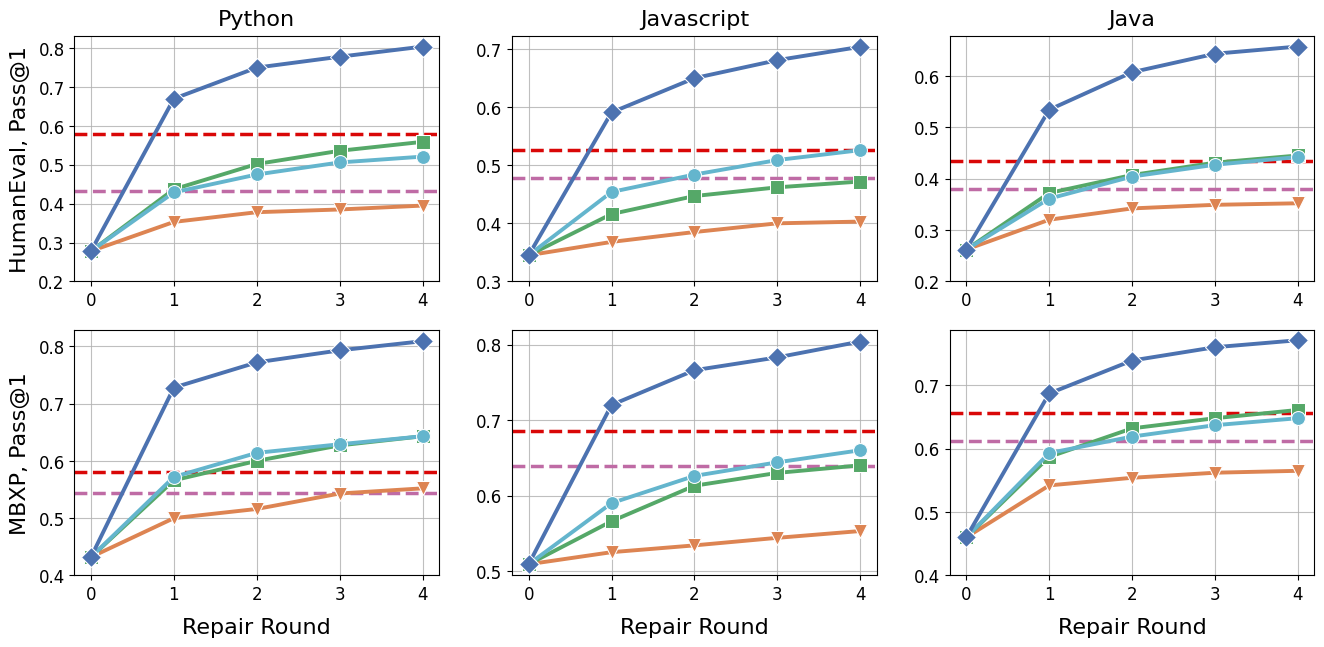

In [ ]:
#@title Camera Ready 2x3 mist
# Camera Ready HRPL Split
# 2 x 3
# ROWS: HRPL HumanEval, HRPL MBXP
# COLS: Python, Javascript, Java
fig, axs = plt.subplots(2, 3, figsize=(16, 7))

# Python
lang = "Python"
pass1_base = [0.432, 0.500, 0.516, 0.543, 0.552]
pass1_icl = [0.432, 0.566, 0.600, 0.627, 0.643]
pass1_ft = [0.432, 0.572, 0.614, 0.629, 0.643]
pass1_gpt = [0.432, 0.728, 0.772, 0.793, 0.809]
pass5 = 0.544
pass10 = 0.580
plot_pass1(1, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.278, 0.353, 0.378, 0.385, 0.395]
pass1_icl = [0.278, 0.437, 0.502, 0.536, 0.559]
pass1_ft = [0.278, 0.429, 0.475, 0.506, 0.521]
pass1_gpt = [0.278, 0.670, 0.750, 0.778, 0.804]
pass5 = 0.383
pass5 = 0.432
plot_pass1(0, 0, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Python")

# Javascript
lang = "Javascript"
pass1_base = [0.509, 0.525, 0.534, 0.544, 0.553]
pass1_icl = [0.509, 0.566, 0.613, 0.630, 0.640]
pass1_ft = [0.509, 0.590, 0.626, 0.644, 0.660]
pass1_gpt = [0.509, 0.720, 0.766, 0.783, 0.804]
pass5 = 0.639
pass10 = 0.686
plot_pass1(1, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.345, 0.368, 0.385, 0.400, 0.403]
pass1_icl = [0.345, 0.416, 0.447, 0.462, 0.472]
pass1_ft = [0.345, 0.454, 0.484, 0.509, 0.526]
pass1_gpt = [0.345, 0.591, 0.650, 0.681, 0.704]
pass5 = 0.478
pass10 = 0.527
plot_pass1(0, 1, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Javascript")

# Java
lang = "Java"
pass1_base = [0.460, 0.542, 0.554, 0.562, 0.565]
pass1_icl = [0.460, 0.587, 0.632, 0.648, 0.661]
pass1_ft = [0.460, 0.593, 0.619, 0.637, 0.648]
pass1_gpt = [0.460, 0.687, 0.739, 0.760, 0.771]
pass5 = 0.612
pass10 = 0.656
plot_pass1(1, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang)

pass1_base = [0.262, 0.320, 0.342, 0.349, 0.352]
pass1_icl = [0.262, 0.372, 0.407, 0.431, 0.445]
pass1_ft = [0.262, 0.361, 0.404, 0.427, 0.442]
pass1_gpt = [0.262, 0.534, 0.607, 0.643, 0.657]
pass5 = 0.379
pass10 = 0.434
plot_pass1(0, 2, pass1_base, pass1_icl, pass1_ft, pass1_gpt, pass5, pass10, lang, title="Java")

plt.savefig('plot_hrpl.pdf', bbox_inches='tight', pad_inches=0.2)
files.download('plot_hrpl.pdf')

plt.subplots_adjust(wspace=0.2)
# plt.tight_layout()
plt.show()